In [1]:
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\bipas\Work\Potato_price_prediction\Agmarknet_Price_Report_Champadanga_files\final_price_champadanga_rainfall_data.csv")

In [3]:
df

,Date,Rainfall,Modal Price (Rs./Quintal),Max Price (Rs./Quintal)
0,2009-08-30,332.7,1620,1630
1,2010-11-02,6.3,590,600
2,2010-06-18,189.3,400,400
3,2012-10-29,64.2,1180,1200
4,2012-12-23,24.6,920,920
...,...,...,...,...
3313,2017-02-03,0.0,360,380
3314,2017-09-16,191.4,540,550
3315,2016-03-06,14.7,1070,1080
3316,2017-02-10,0.0,360,380


In [4]:
# Extract month and year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])



df['Month'] = df['Date'].dt.strftime('%m').str.upper()
df['Year'] = df['Date'].dt.year

In [5]:
df.dtypes

Date                         datetime64[ns]
Rainfall                            float64
Modal Price (Rs./Quintal)             int64
Max Price (Rs./Quintal)               int64
Month                                object
Year                                  int32
dtype: object

In [6]:
# Convert the 'Month' column to integer type
df['Month'] = df['Month'].astype(int)

In [13]:
df

,Date,Rainfall,Modal Price (Rs./Quintal),Max Price (Rs./Quintal),Month,Year
0,2009-08-30,332.7,1620,1630,8,2009
1,2010-11-02,6.3,590,600,11,2010
2,2010-06-18,189.3,400,400,6,2010
3,2012-10-29,64.2,1180,1200,10,2012
4,2012-12-23,24.6,920,920,12,2012
...,...,...,...,...,...,...
3313,2017-02-03,0.0,360,380,2,2017
3314,2017-09-16,191.4,540,550,9,2017
3315,2016-03-06,14.7,1070,1080,3,2016
3316,2017-02-10,0.0,360,380,2,2017


In [7]:
X = df.drop(columns=["Modal Price (Rs./Quintal)", "Max Price (Rs./Quintal)",'Date'])
y = df["Modal Price (Rs./Quintal)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [8]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 53.17303122603186


In [10]:
my_model.score(X_test,y_test)

0.9590611642086703

In [12]:
my_model.score(X_train,y_train)

0.9638236756293967

In [20]:
# Predict on the testing set
y_pred = my_model.predict(X_test)

In [23]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [24]:
mse

7739.035188665659

In [25]:
r_squared

0.9590611642086703

Text(0.5, 1.0, 'Actual vs. Predicted Prices')

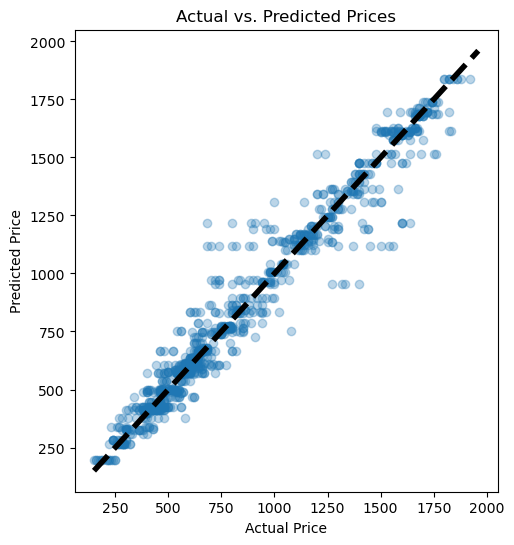

In [26]:

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')

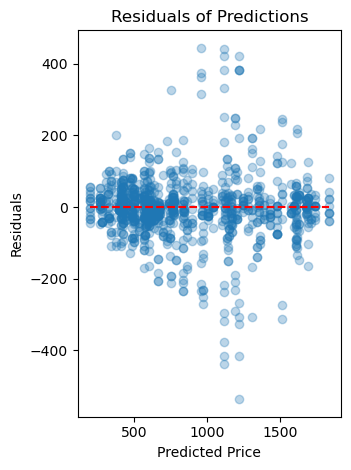

In [27]:
# Residual plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')

plt.tight_layout()
plt.show()

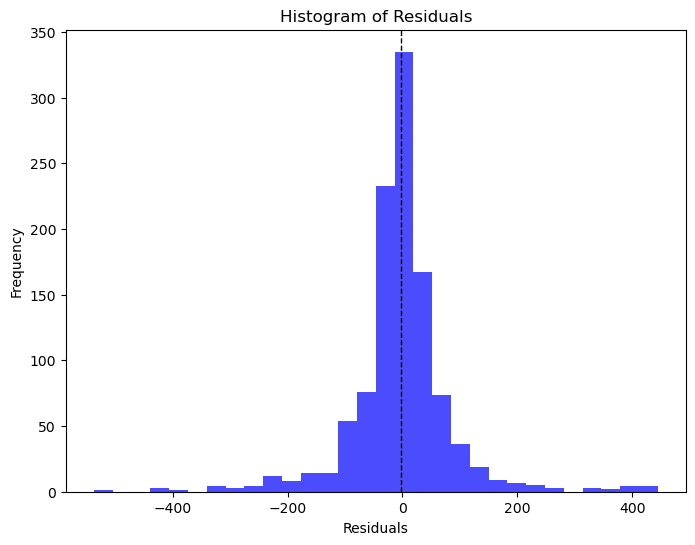

In [28]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.axvline(residuals.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()